In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt

data_1 = pd.read_csv('/Datasets/Airbnb/listings.csv')
data_1 = data_1.rename(columns = {'id':'listing_id'})
data_2 = pd.read_csv('/Datasets/Airbnb/reviews.csv')
data_all = pd.merge(data_2, data_1, on='listing_id')
data_all['name'] = data_all['name'].astype(str)
data_all['year'] = data_all['date'].apply(lambda x: x[:4]).astype(int)

Let's examine the most frequent words in the visitors' comments per year. 

Words such as 'clean', 'host', 'perfect' are highlighted by the wordclouds below. 

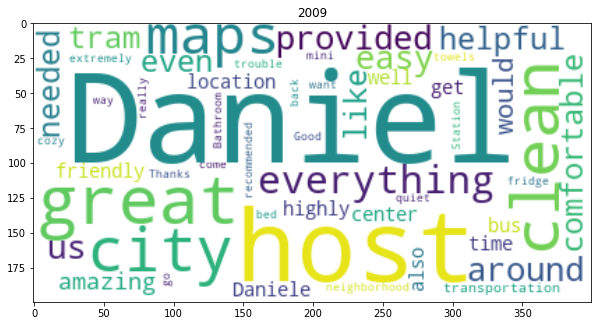

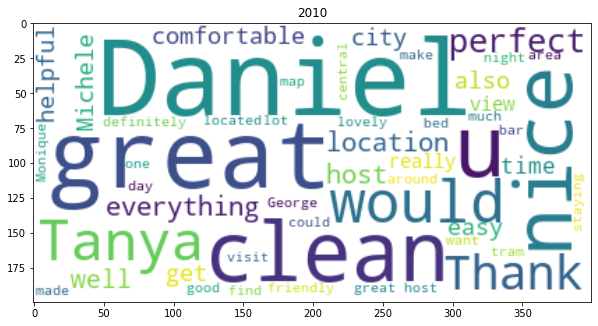

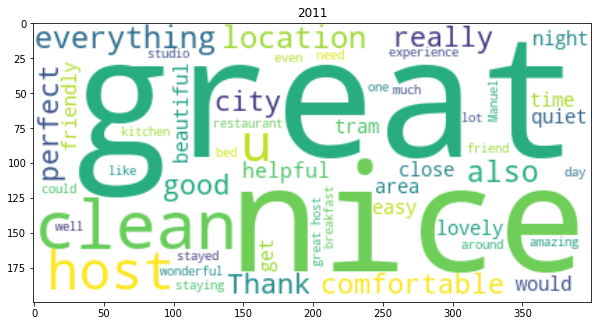

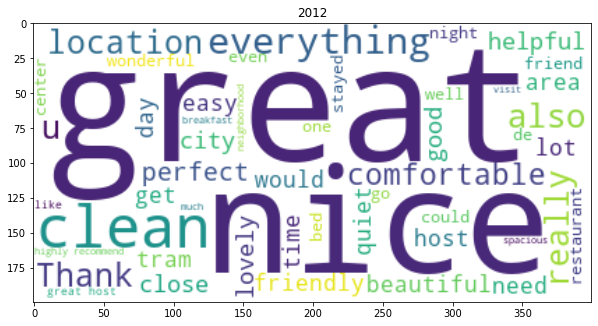

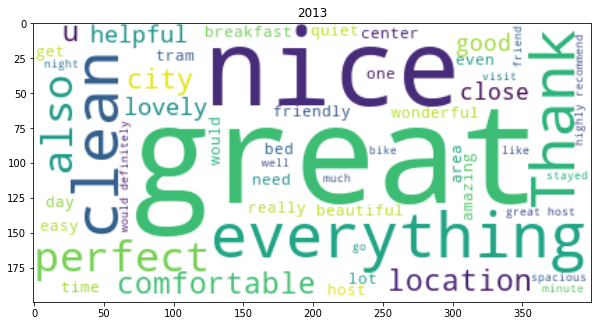

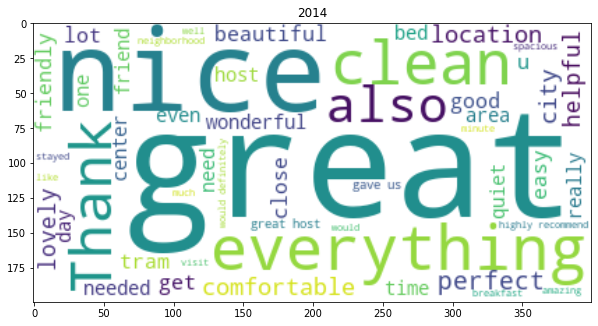

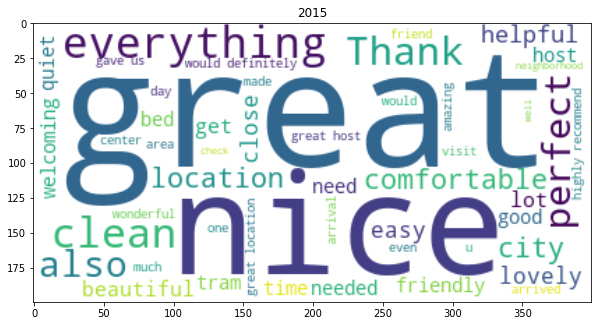

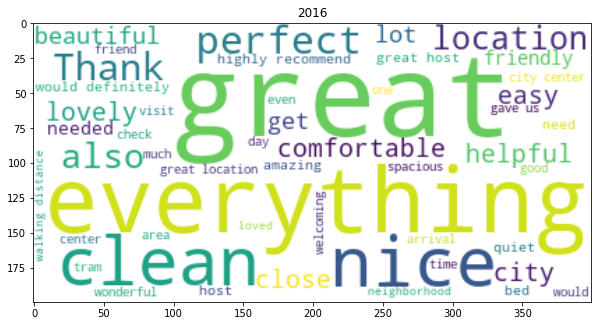

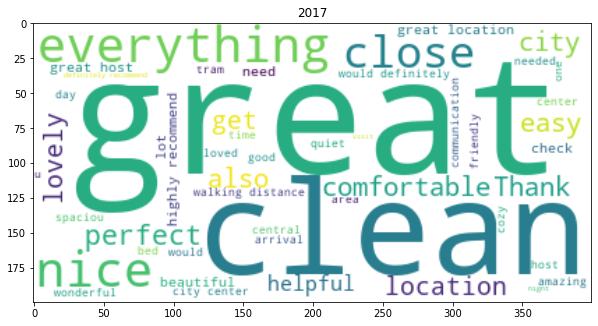

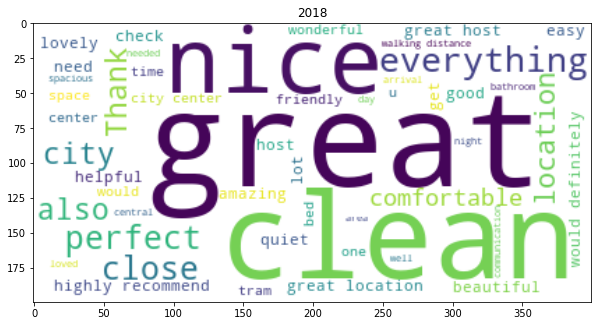

In [2]:
stopwords = stopwords.words('english')
newstops = ['Amsterdam', 'stay', 'place', 'apartment', 'flat', 'room', 'home', 'house']
stopwords.extend(newstops)

wordcloud = WordCloud(background_color='white', max_words=50, stopwords=stopwords)

for year in np.arange(2009, 2019, 1):
    wordcloud.generate(' '.join(data_all[data_all['year'] == year]['comments'].astype(str)))
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(year)

Based on those frequent words, let's see if their importance for the Airbnb listing, measured by the proxy of the number of reviews per month. 

The line plot below suggests that, although the overall frequencies of the analyzed words is shrinking, some of them keep a high relevance such as 'host' and 'clean'. This, in turn, seem to reflect the most looked for characteristics in Airbnb bookings for this city. 

Text(0, 0.5, 'Frequency')

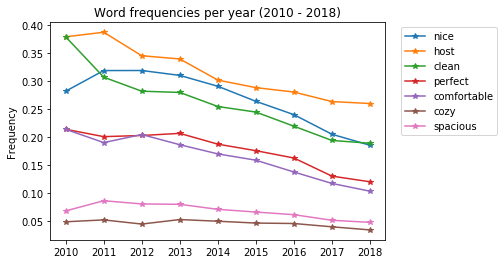

In [3]:
def word_frequencies(word):
    freqs = []
    for year in np.arange(2010, 2019, 1):
        freqs.append(sum([1 for i in data_all[data_all['year'] ==  year]['comments'].astype(str) if word in i])/len(data_all[data_all['year'] ==  year]['comments']))
    return freqs

obtained_freqs = []
for word in ['nice', 'host', 'clean', 'perfect', 'comfortable', 'cozy', 'spacious']:
    obtained_freqs.append(word_frequencies(word))
    
fig = plt.figure()
ax = fig.add_subplot(111)

for i, word in zip(np.arange(0, 7, 1), ['nice', 'host', 'clean', 'perfect', 'comfortable', 'cozy', 'spacious']):
    plt.plot(np.arange(2010, 2019, 1), obtained_freqs[i], marker='*', label=word)
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.title('Word frequencies per year (2010 - 2018)')
plt.ylabel('Frequency')